In [2]:
import pandas as pd
import numpy as np 

E:\jupyter\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
a="Processed_Flipdata.xlsx"

In [4]:
df=pd.read_csv(r"C:\Users\anshu\OneDrive\Desktop\Processed_Flipdata.csv")

In [5]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


# Observations
- No missing values.
- Numerical columns: Memory, RAM, Battery_, AI Lens, Mobile Height, Prize(target variable)
- Categorical columns: Model, Colour, Rear Camera, Front Camera, Processor_.

In [7]:
#dropping off unnamed column as it doesn't5 have any important values
data =df.drop(columns=['Unnamed: 0'])

In [8]:
data

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [9]:
# Let's align everything in numerical form.
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [11]:
categorical_columns = ['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_','Prize']

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    int32  
 1   Colour         541 non-null    int32  
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    int32  
 6   Front Camera   541 non-null    int32  
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    int32  
 10  Prize          541 non-null    int32  
dtypes: float64(1), int32(6), int64(4)
memory usage: 33.9 KB


# Determining outliers
- Lets identify outliers using Z-scores and visualize them using boxplots.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
num_col=['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_' ,'Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize']

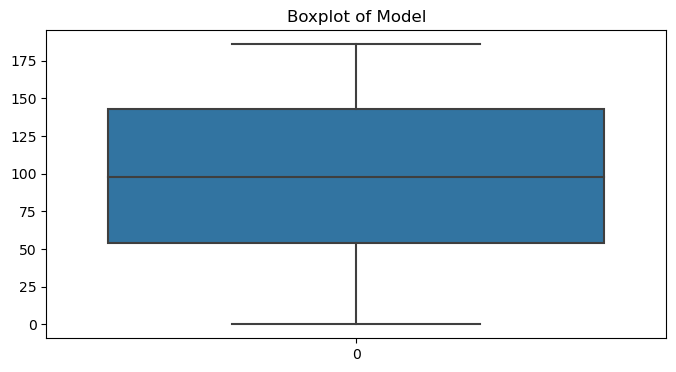

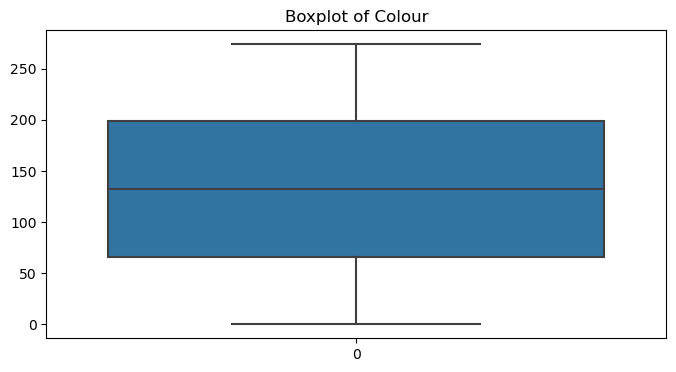

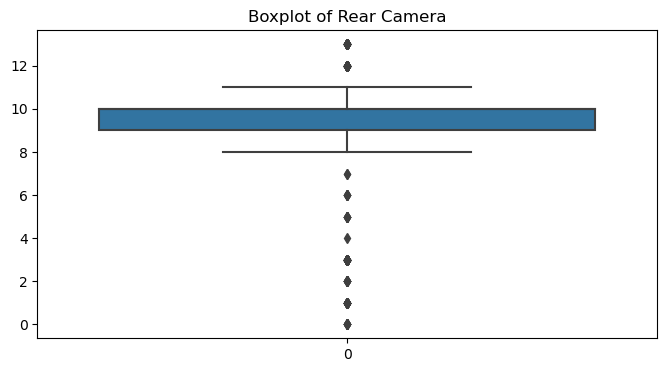

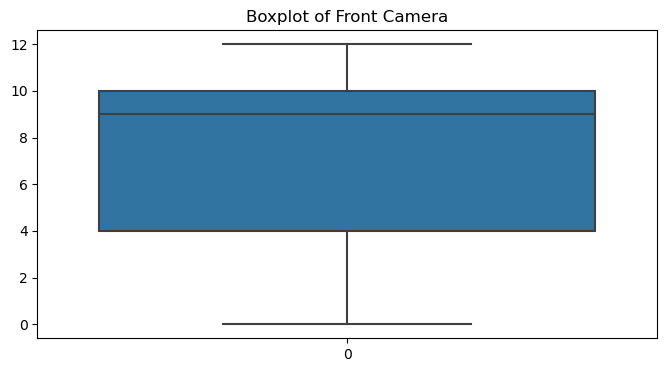

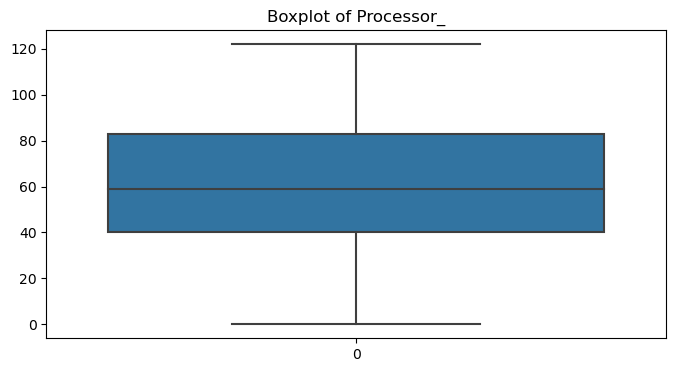

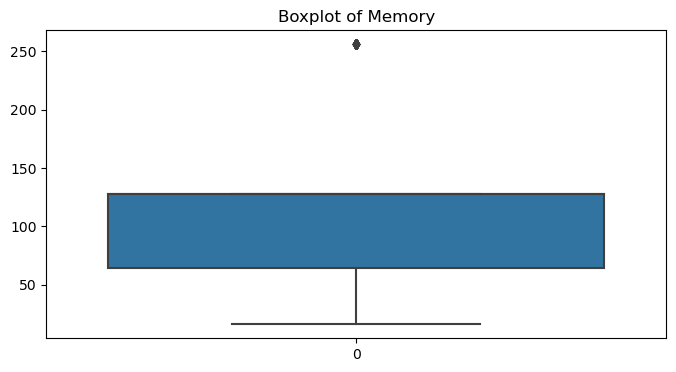

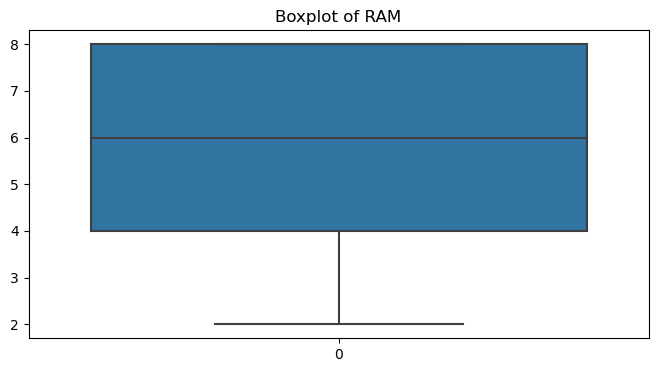

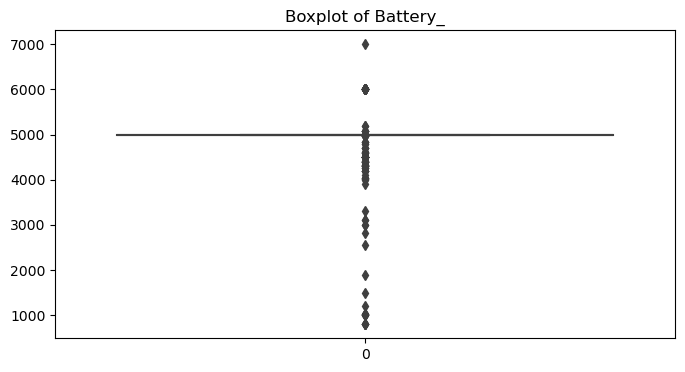

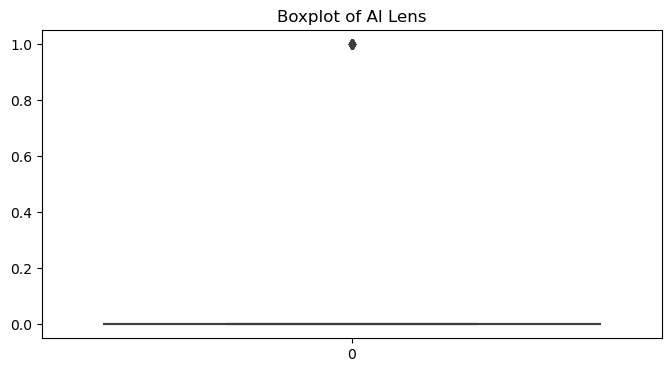

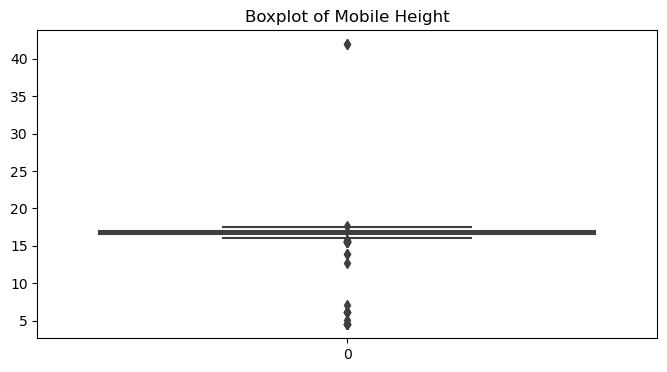

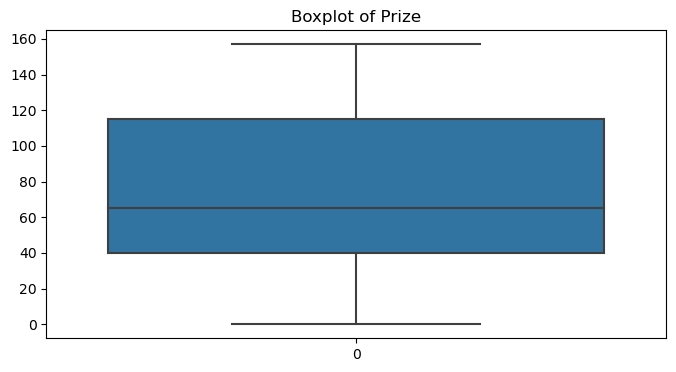

In [15]:
for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [16]:
# Use Z-score to identify outliers
from scipy.stats import zscore

In [17]:
# Calculate Z-scores for numerical columns
z_scores = np.abs(zscore(data[num_col]))

In [18]:
# Set a threshold for identifying outliers (typically 3 or above is considered an outlier)
threshold = 3
outliers = np.where(z_scores > threshold)

In [19]:
# Display rows with outliers
print(f"Number of outliers: {len(outliers[0])}")

Number of outliers: 67


In [20]:
#Lets cap the data as to remove outlier will highly impact 
data_capped = data.copy()
threshold = 3

for col in num_col:
    upper_limit = data[col].mean() + threshold * data[col].std()
    lower_limit = data[col].mean() - threshold * data[col].std()
    
    data_capped[col] = np.where(data[col] > upper_limit, upper_limit,
                                np.where(data[col] < lower_limit, lower_limit, data[col]))

In [21]:
print(f"Shape of dataset after capping outliers: {data_capped.shape}")

Shape of dataset after capping outliers: (541, 11)


In [22]:
print(f"Shape of dataset before capping outliers: {data.shape}")

Shape of dataset before capping outliers: (541, 11)


# Numerical features and split data
-Now, let’s proceed to scale the numerical features and prepare the dataset for model building. We will split the dataset into features (X) and target (y), and scale the numerical features to ensure they are on the same scale.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
# Separate features and target variable
X = data_capped.drop(columns=['Prize'])
y = data_capped['Prize']

In [25]:
X , y

(     Model  Colour  Memory  RAM  Battery_  Rear Camera  Front Camera  \
 0     23.0   159.0    64.0  4.0    6000.0          3.0          10.0   
 1     23.0    20.0    64.0  4.0    6000.0          3.0          10.0   
 2     37.0   149.0   128.0  8.0    5000.0         10.0           4.0   
 3     69.0   201.0    32.0  2.0    5000.0         13.0          10.0   
 4     12.0   130.0   128.0  8.0    5000.0         10.0          10.0   
 ..     ...     ...     ...  ...       ...          ...           ...   
 536  118.0    49.0   256.0  8.0    3900.0         10.0           2.0   
 537   32.0    52.0    32.0  2.0    3100.0         11.0           6.0   
 538  123.0   259.0    64.0  4.0    5000.0         10.0          12.0   
 539  110.0    17.0   128.0  8.0    5000.0         10.0           7.0   
 540   59.0   215.0   128.0  4.0    5000.0         10.0          12.0   
 
       AI Lens  Mobile Height  Processor_  
 0    0.791581          16.76       113.0  
 1    0.791581          16.76     

In [26]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape

(432, 10)

In [28]:
X_test.shape

(109, 10)

In [29]:
y_train.shape

(432,)

In [30]:
y_test.shape

(109,)

In [31]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Display the shape of training and test sets
print("Training features shape:", X_train_scaled.shape)
print("Test features shape:", X_test_scaled.shape)

Training features shape: (432, 10)
Test features shape: (109, 10)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Initialize the Linear Regression model
model = LinearRegression()

In [35]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred

array([103.77401705,  99.57293107,  58.83188354,  81.29327089,
        83.88875756,  89.21368084,  84.3590078 ,  52.86813827,
        61.1760984 ,  97.24840336,  80.93459924,  66.65565007,
        58.78350229,  85.51607108,  62.92633955,  76.92160237,
       108.58592037,  48.84737651,  37.52032629,  53.28126739,
       107.51467138,  45.55509656,  94.13201995,  49.1306858 ,
        75.0252645 ,  62.96848782,  97.40314122,  52.77571181,
        81.30161923,  89.01142647,  89.48539911,  70.39292872,
        55.34977479,  78.33235481,  67.04922615,  89.23245495,
        96.61365433,  56.71605506,  73.92196497, 106.60076569,
        76.65971489,  87.61730304,  44.17992368,  89.79798956,
       115.06861114,  59.57197728,  57.82289894,  87.26243502,
       104.56981275,  95.81526355,  50.49899767,  54.21084733,
       103.39476381, 100.04330544,  84.11656854,  83.77025817,
        53.84158252,  53.41638867,  81.92202606,  80.17774298,
        96.87752726,  54.62868482,  94.90737261,  50.82

In [37]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1609.0509035745997
R² Score: 0.28944627949770385


In [38]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")

Random Forest Mean Squared Error: 374.100864973044
Random Forest R² Score: 0.8347977923761195


In [39]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [40]:
import xgboost as xgb

In [41]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R² Score: {r2_xgb}")

XGBoost Mean Squared Error: 317.48234706745234
XGBoost R² Score: 0.8598004187428613


In [42]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                                 cv=5, scoring='r2', n_jobs=-1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters found: ", grid_search_xgb.best_params_)

# Best model
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions with the best model
y_pred_best_xgb = best_xgb_model.predict(X_test_scaled)

# Evaluate the best model
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"Best XGBoost Mean Squared Error: {mse_best_xgb}")
print(f"Best XGBoost R² Score: {r2_best_xgb}")




Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best XGBoost Mean Squared Error: 342.3936969056243
Best XGBoost R² Score: 0.8487996155545197


# Hence XGboost is giving the good results
- let's try with the sample input

In [43]:
data

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,23,159,64,4,6000,3,10,1,16.76,113,125
1,23,20,64,4,6000,3,10,1,16.76,113,125
2,37,149,128,8,5000,10,4,0,16.64,75,25
3,69,201,32,2,5000,13,10,0,16.56,56,103
4,12,130,128,8,5000,10,10,1,16.76,14,146
...,...,...,...,...,...,...,...,...,...,...,...
536,118,49,256,8,3900,10,2,0,15.49,89,133
537,32,52,32,2,3100,11,6,0,12.70,68,106
538,123,259,64,4,5000,10,12,0,16.76,35,155
539,110,17,128,8,5000,10,7,0,16.26,11,96


In [44]:
sample=pd.DataFrame({'Model':[23], 'Colour':[20] , 'Memory':[64], 'RAM':[4] ,'Battery_':[6000] , 'Rear Camera':[3] , 'Front Camera':[14], 'AI Lens':[1] , 'Mobile Height':[17] , 'Processor_':[115]}) 
sample

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_
0,23,20,64,4,6000,3,14,1,17,115


In [45]:
# Scale the sample input
sample_input_scaled = scaler.transform(sample)

In [46]:
# Make a prediction
predicted_price = best_xgb_model.predict(sample_input_scaled)

In [47]:
predicted_price

array([138.81622], dtype=float32)

# The above shows the right prediction of the data .

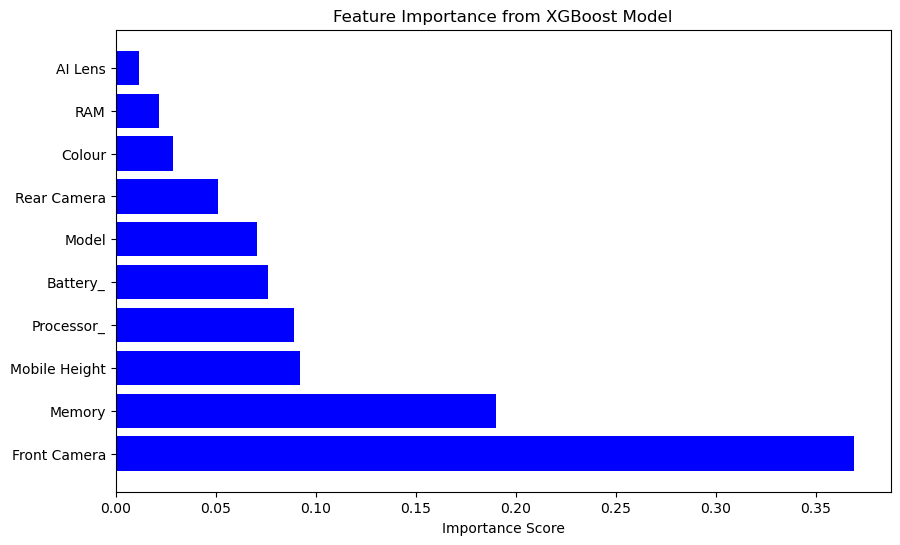

In [48]:
# Feature importance
importance = best_xgb_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from XGBoost Model')
plt.show()

In [49]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_xgb_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {np.mean(cv_scores)}")


Cross-Validation R² Scores: [0.90775411 0.72202107 0.84162436 0.66356506 0.82333328]
Mean Cross-Validation R² Score: 0.7916595777504318


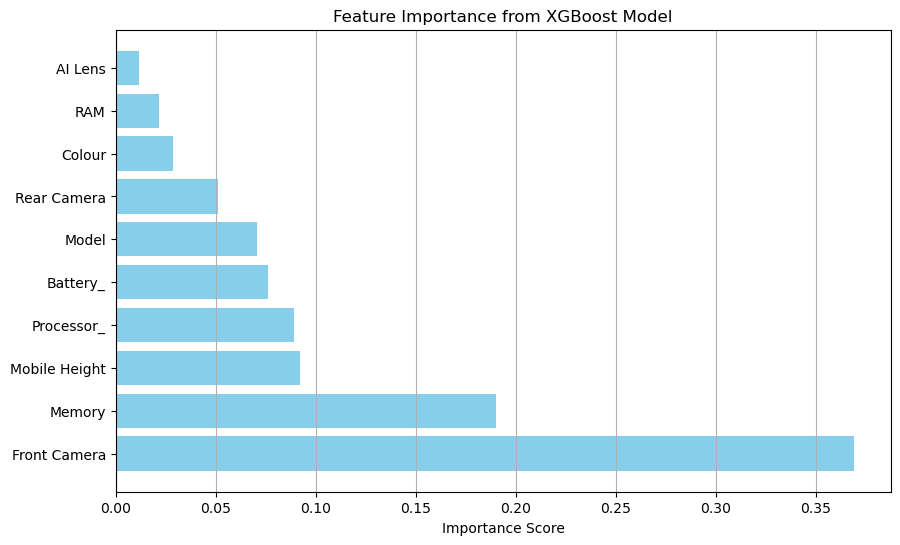

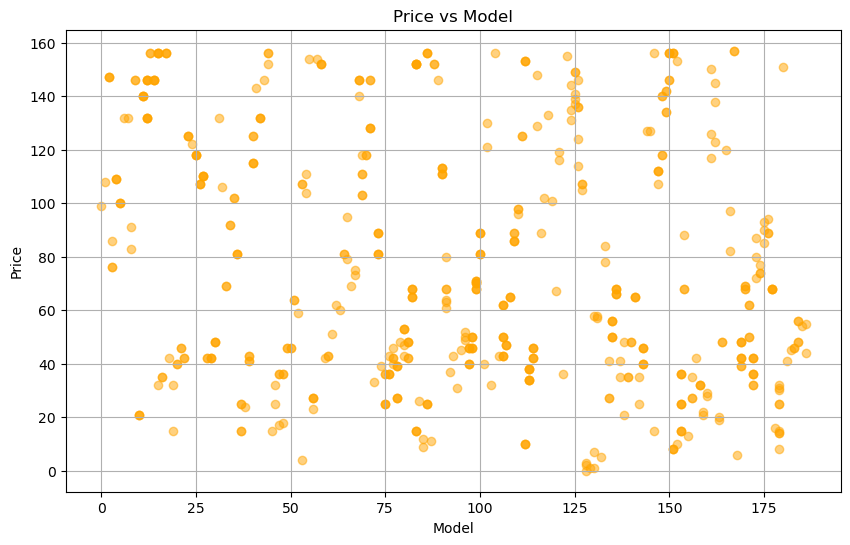

In [50]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from XGBoost Model')
plt.grid(axis='x')
plt.show()

# Optionally, visualize price vs. key features
plt.figure(figsize=(10, 6))
plt.scatter(X['Model'], y, color='orange', alpha=0.5)
plt.xlabel('Model')
plt.ylabel('Price')
plt.title('Price vs Model')
plt.grid()
plt.show()

### FEATURE ANALYSIS
- Let's go ahead and analyze the feature importance results to derive actionable business insights. We'll focus on identifying the top features that most influence mobile phone prices and extract insights from them.


In [51]:
# Display the top 5 features by importance
top_features = feature_importance_df.head(5)
print(top_features)

         Feature  Importance
6   Front Camera    0.368870
2         Memory    0.189883
8  Mobile Height    0.092192
9     Processor_    0.089065
4       Battery_    0.076057


### Insights

- Front Camera is the most important factor influencing mobile phone pricing.
Recommendation: Consider developing and marketing mobile phones with high pixel front camera , including software optimizations, such as night mode or AI-enhanced photography. Promote camera quality in campaigns, targeting social media users who value good photography.. Highlight resolutions in advertisements to attract customers.

- Memory is a significant factor for customers when deciding on mobile phones.
Recommendation: Invest in enhancing capacity and emphasize this feature in your marketing campaigns. It’s a key point that can differentiate your product from others, particularly among users who value long battery life.

- Mobile Height plays a major role in the perceived value of a phone.
Recommendation: Invest in mordenizing mobile heights, including facts that it should be handy and also the screen is ider and long enough for good resolution . Also the screen material should be strong enough to last longer.

- Processor influences the price, which is understandable given the increased processing speed needs of users (e.g., photos, videos, and apps).
Recommendation: Provide high tech processor options for each phone model, including replacable oprion. Highlight these options to appeal to users who prefer having control over their storage needs.

-  Battery life is a significant factor for customers when deciding on mobile phones.
Recommendation: Invest in enhancing battery capacity and emphasize this feature in your marketing campaigns. It’s a key point that can differentiate your product from others, particularly among users who value long battery life.

### Front Camera VS Price

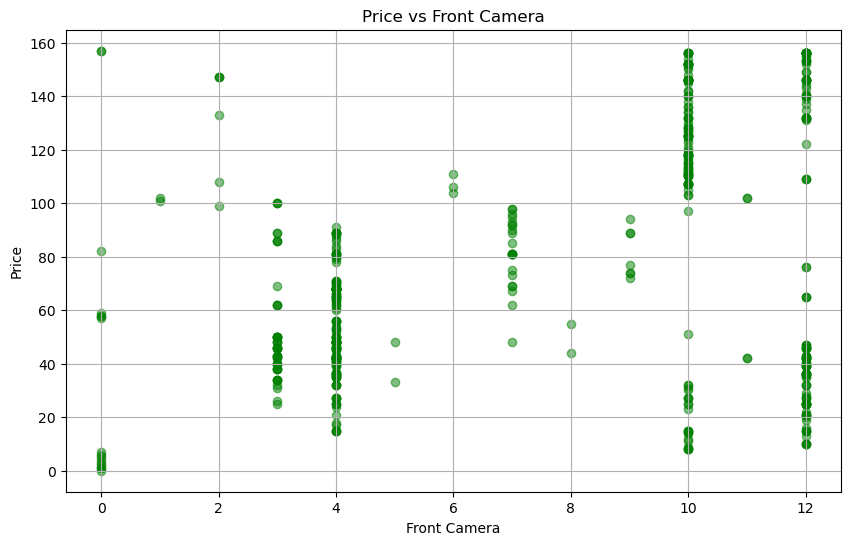

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Front Camera'], y, color='green', alpha=0.5)
plt.xlabel('Front Camera')
plt.ylabel('Price')
plt.title('Price vs Front Camera')
plt.grid()
plt.show()


### Memory

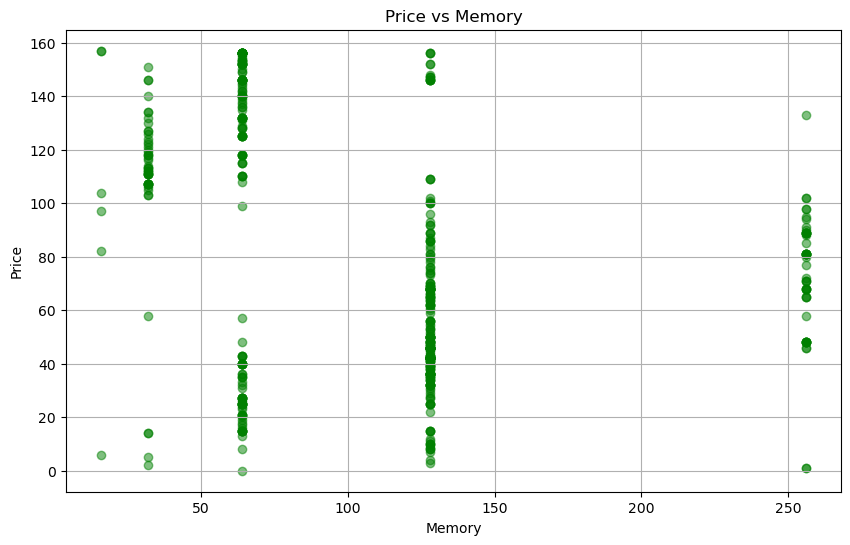

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Memory'], y, color='green', alpha=0.5)
plt.xlabel('Memory')
plt.ylabel('Price')
plt.title('Price vs Memory')
plt.grid()
plt.show()

### Summary
- The insights derived from the feature importance analysis can help you make informed business decisions on product development, marketing, and pricing. Emphasizing the features that influence price the most will give your company a competitive edge.
